In [1]:
import os
import numpy as np

import drjit as dr
import mitsuba as mi

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import normalized_root_mse as nrmse
from skimage.metrics import mean_squared_error as mse
from PIL import Image

mi.set_variant('scalar_rgb')

output_folder = 'images'
os.makedirs(output_folder, exist_ok=True)

[mitsuba] Warning: Couldn't import the ipywidgets package. Installing this package is required for the system to properly log messages and print in Jupyter notebooks!


In [2]:
def convert_img(im):
    im_gamma_correct = np.clip(np.power(im, 0.45), 0, 1)
    im_fixed = Image.fromarray(np.uint8(im_gamma_correct*255))
    
    return np.array(im_fixed)

def compute_methods(ref, scene_file, methods):
    
    computed_images = {}
    for mis_method in methods:

        output_image_path = f"{output_folder}/veach_tsallis.exr"

        # update scene params
        scene = mi.load_file(scene_file)
        params = mi.traverse(scene)
        params['PerspectiveCamera.film.mis_model_type'] = mis_method
        params.update();

        image = mi.render(scene, spp=10)
        image = convert_img(np.array(image))

        if mis_method not in computed_images:
            computed_images[mis_method] = image
            
        print(f'{mis_method}: [MSE: {mse(ref, image)}, SSIM: {ssim(ref, image, channel_axis=2)}]')

In [3]:
methods = ["balance", "power", "tsallis", "linear1", "linear2", "linear3"]

In [4]:
scene = mi.load_file("scenes/veach-mis/scene.xml")
params = mi.traverse(scene)
params['PerspectiveCamera.film.mis_model_type'] = 'power'
params.update();
ref = mi.render(scene, spp=1000)
ref = convert_img(np.array(ref))

[NRMSE: 0.0003123251055109294, SSIM: 0.9999906418455171]


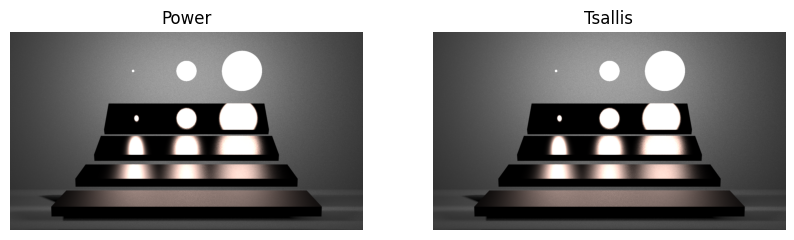

In [79]:
#import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(10, 10))
#fig.add_subplot(1,2,1).imshow(ref); plt.axis('off'); plt.title('Power')
#fig.add_subplot(1,2,2).imshow(tsallis); plt.axis('off'); plt.title('Tsallis')
#print(f'[NRMSE: {nrmse(ref, tsallis)}, SSIM: {ssim(ref, tsallis, channel_axis=2, data_range=1)}]')

In [5]:
compute_methods(ref, "scenes/veach-mis/scene.xml", methods)

balance: [MSE: 55.52784360532407, SSIM: 0.7807439581417888]
power: [MSE: 56.20763237847222, SSIM: 0.7861843168293013]
tsallis: [MSE: 320.4049967447917, SSIM: 0.4661216597825811]
linear1: [MSE: 135.84800745081017, SSIM: 0.6476543050198811]
linear2: [MSE: 135.84800745081017, SSIM: 0.6476543050198811]
linear3: [MSE: 135.84800745081017, SSIM: 0.6476543050198811]


In [6]:
scene = mi.load_file("scenes/veach-mis/scene_no_background.xml")
params = mi.traverse(scene)
params['PerspectiveCamera.film.mis_model_type'] = 'power'
params.update();
ref = mi.render(scene, spp=1000)
ref = convert_img(np.array(ref))

In [7]:
compute_methods(ref, "scenes/veach-mis/scene_no_background.xml", methods)

balance: [MSE: 6250.814137731481, SSIM: 0.24856736968994428]
power: [MSE: 6252.078689236111, SSIM: 0.24808466711641622]
tsallis: [MSE: 6237.275688295717, SSIM: 0.22908098172116534]
linear1: [MSE: 6271.373272931134, SSIM: 0.23565638570326822]
linear2: [MSE: 6271.373272931134, SSIM: 0.23565638570326822]
linear3: [MSE: 6271.373272931134, SSIM: 0.23565638570326822]
